# Truth or Bluff 
## Using Support Vector Regression

In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Getting the Dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
#Setting the variables
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y
     )

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
#Reshaping y from 1D to 2D
y = y.reshape(-1,1)

In [12]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

/home/sid/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
#Fitting the Dataset into thr model
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X, y)


/home/sid/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

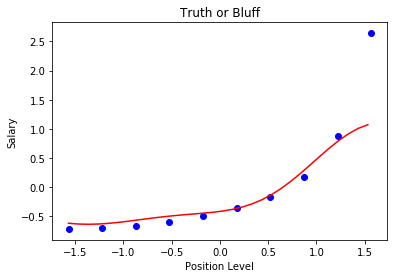

In [14]:
#Visualising the regression results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y ,color = 'blue')
plt.title("Truth or Bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
plt.show()


In [21]:
#Predicting the Values 
y_pred = regressor.predict(sc_X.transform(6.5))
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([ 170370.0204065])